<a href="https://colab.research.google.com/github/tahamsi/computer-vision/blob/main/week-10/Object_tracking_and_counting_with_yolo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/tahamsi/computer-vision)

# Object Tracking


**Object tracking** is a field within computer vision that involves the process of locating and following a specific object or multiple objects in a sequence of frames within a video. The primary goal of object tracking is to identify and trace the movement of objects over time as they move within a video or a series of consecutive frames.

The process of object tracking typically involves the following steps:

* Detection: Initially, an object detector or segmentation algorithm identifies and localizes objects within the first frame of the video sequence.

* Initialization: Once the object is detected in the first frame, a bounding box or a specific region of interest around the object is defined, and its characteristics (such as appearance features, color, shape, or motion) are extracted to create a representation.

* Tracking: Using the defined characteristics, the tracker continuously predicts the object's position or state in subsequent frames by updating and adjusting the initial representation. This is done by estimating the object's location, size, orientation, and other relevant attributes.

* Updating: As the object moves, changes direction, or experiences occlusion, the tracking algorithm adapts to these variations, maintaining the object's trajectory and characteristics across frames.

## YOLO
YOLO (You Only Look Once) is a popular deep learning model used for real-time object detection. It was introduced by Joseph Redmon and is known for its ability to detect multiple objects in an image or video frame with high speed and accuracy. YOLO stands out due to its innovative approach of treating object detection as a single regression problem, enabling it to predict bounding boxes and class probabilities directly from full images in one evaluation.

Key Features

* Single-Pass Detection: Unlike traditional object detection methods that use a multi-stage process (e.g., region proposal and classification), YOLO processes an image in a single neural network pass, making it extremely fast and suitable for real-time applications.
* Grid-Based Prediction: YOLO divides the input image into a grid and assigns each grid cell the responsibility of predicting bounding boxes and their associated class probabilities if the center of an object falls within that cell.
* End-to-End Learning: The model is trained end-to-end, optimizing for both object localization and classification simultaneously.
* Speed and Efficiency: YOLO is capable of processing images at high frame rates, making it suitable for applications that require real-time performance, such as video surveillance, autonomous vehicles, and interactive systems.

## YOLO11
[Ultralytics YOLO11](https://docs.ultralytics.com/modes/track/) is a state-of-the-art model that builds on the success of previous YOLO versions, incorporating new features and enhancements to further improve performance and flexibility. **YOLO11** is designed to be fast, accurate, and user-friendly, making it an ideal choice for a variety of tasks, including object detection, tracking, instance segmentation, image classification, and pose estimation.

The output from Ultralytics trackers aligns with standard object detection while incorporating object IDs, enabling seamless object tracking in video streams and advanced analytics. Here’s why Ultralytics YOLO is an excellent choice for your object tracking needs:

* **Efficiency**: Processes video streams in real-time with high accuracy.
* **Flexibility**: Supports various tracking algorithms and configurable options to suit diverse use cases.
* **Ease of Use**: Features a straightforward Python API and CLI for quick setup and deployment.
* **Customizability**: Compatible with custom-trained YOLO models, making it ideal for domain-specific applications.

## Before you start

Let's make sure that we have access to `GPU`. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit -> Notebook settings -> Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Wed Nov 20 12:18:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Install YOLO

Install the Ultralytics package, along with all required dependencies, in a Python environment (version 3.8 or higher) with `PyTorch` (version 1.8 or higher) using the following command: `pip install ultralytics`.

In [2]:
!pip install ultralytics

from IPython import display
display.clear_output()

In [3]:
import os
HOME = os.getcwd()
!mkdir -p {HOME}/data

### Load Data

In [4]:
!wget https://raw.githubusercontent.com/tahamsi/computer-vision/refs/heads/main/images/people.mp4 -P {HOME}/data
source_video = f"{HOME}/data/people.mp4"
display.clear_output()

## Build a model

You can now choose the core model for your object tracking tasks: either object detection or instance segmentation as the base model. Whichever mode you select, the corresponding checkpoints will be automatically downloaded.

In [5]:
from ultralytics import YOLO

model = YOLO("yolo11n-seg.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.90M/5.90M [00:00<00:00, 291MB/s]


## Tracking objects in a video using Yolo.track()

Object tracking within video analytics stands as a pivotal task, not only discerning object location and classification within frames but also preserving unique identification for each detected object's progression throughout the video. Its applications span a broad spectrum, encompassing areas from surveillance and security to real-time sports analytics.

### Available Trackers
[Ultralytics YOLO](https://docs.ultralytics.com/modes/track/#real-world-applications) supports the following tracking algorithms, which can be enabled by specifying the corresponding `YAML` configuration file using `tracker=tracker_type.yaml`:

* [BoT-SORT](https://github.com/NirAharon/BoT-SORT): Use `botsort.yaml` to enable this tracker.
[ByteTrack](https://github.com/ifzhang/ByteTrack): Use `bytetrack.yaml` to enable this tracker.

By default, the tracker is set to BoT-SORT.



0: 384x640 25 persons, 14.3ms
Speed: 2.8ms preprocess, 14.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


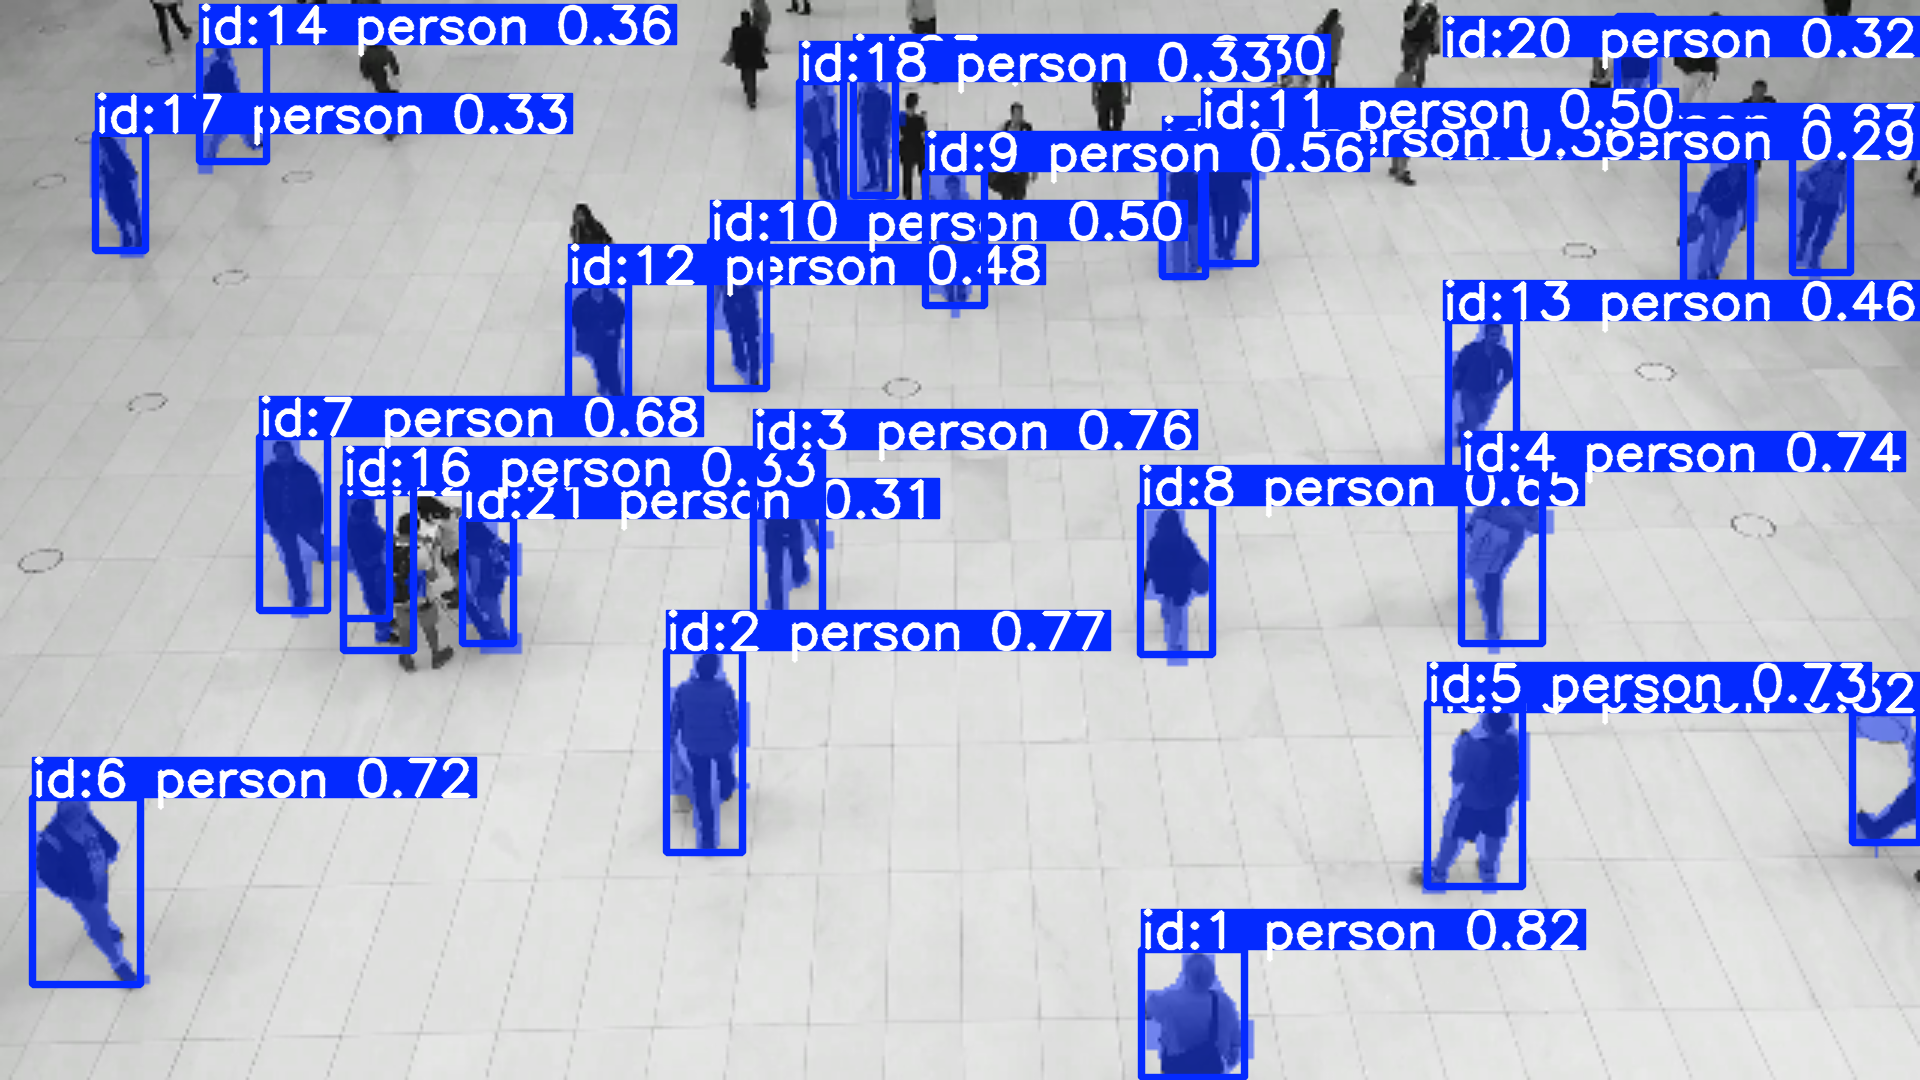


0: 384x640 25 persons, 19.1ms


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Open the video file
cap = cv2.VideoCapture(source_video)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:

        results = model.track(frame, persist=True)

        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2_imshow(annotated_frame)


    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

### Issues
* Presence of undesired classes in the output.
* Lack of output in video format.


## Tracking objects in a video using CLI

You can directly initiate a Yolov11 model via the CLI mode and download the resulting video from Colab.

In [ ]:
%cd
!yolo task = detect mode = predict model = yolo11n-seg.pt conf = 0.25 source = {source_video}

### Issues
* Presence of undesired classes in the output.
* Absence of object tracking functionality.

In [ ]:
from google.colab import files
files.download('runs/segment/predict/people.avi')